# Chapter 10 - Introduction to Artificial Neural Networks with Keras

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [14]:
tf.__version__

'2.4.1'

In [15]:
keras.__version__

'2.4.0'

In [16]:
fashion_mnist = keras.datasets.fashion_mnist

In [55]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [56]:
X_train_full.shape

(60000, 28, 28)

In [57]:
X_train_full.dtype

dtype('uint8')

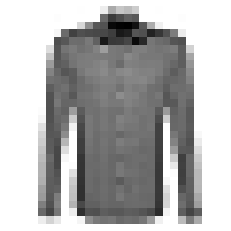

In [58]:
# scaling the data

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[15], cmap="binary")
plt.axis('off')
plt.show()

In [59]:
# definindo o nome das classes

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [60]:
class_names[y_train[15]]

'Shirt'

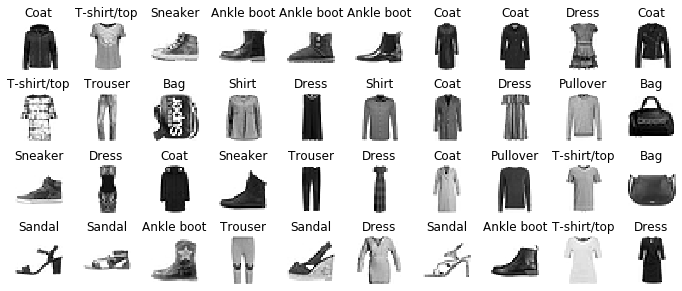

In [61]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [62]:
# criando o modelo


model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) #10 classes

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1510      
Total params: 282,160
Trainable params: 282,160
Non-trainable params: 0
_________________________________________________________________


In [64]:
y_train_full[1] #sparse_categorical_crossentropy

0

In [65]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [66]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=30)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9670 - accuracy: 0.7053 - val_loss: 0.5002 - val_accuracy: 0.8320
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5054 - accuracy: 0.8245 - val_loss: 0.4514 - val_accuracy: 0.8436
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4481 - accuracy: 0.8426 - val_loss: 0.4154 - val_accuracy: 0.8512
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4156 - accuracy: 0.8556 - val_loss: 0.4076 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3952 - accuracy: 0.8611 - val_loss: 0.3751 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3702 - accuracy: 0.8693 - val_loss: 0.3749 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3676 - accuracy: 0.8680 - val_loss: 0.3641 - val_accuracy:

(0, 1)

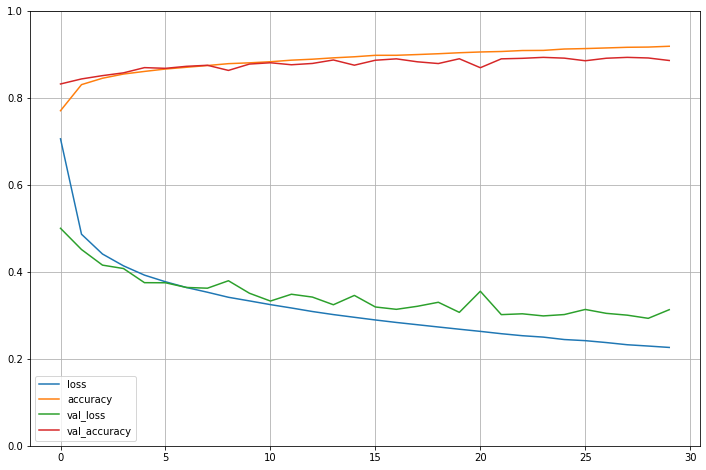

In [67]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.ylim(0,1)

In [68]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8747


[0.3558841347694397, 0.8747000098228455]

In [69]:
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(150, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)



Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 2.9464 - val_loss: 0.7251
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6730 - val_loss: 0.5795
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5923 - val_loss: 0.5230
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5357 - val_loss: 0.4852
Epoch 5/30
363/363 [==============================] - 0s 997us/step - loss: 0.4959 - val_loss: 0.4541
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4602 - val_loss: 0.4295
Epoch 7/30
363/363 [==============================] - 0s 989us/step - loss: 0.4587 - val_loss: 0.4115
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4339 - val_loss: 0.3976
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4204 - val_loss: 0.3881
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4111 - val_loss: 0.

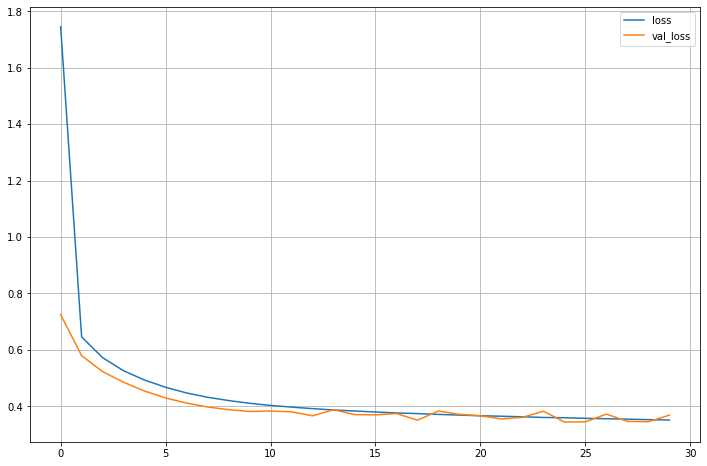

In [77]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)


In [78]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])


In [79]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.2561 - val_loss: 1.2314
Epoch 2/20
363/363 [==============================] - 0s 926us/step - loss: 0.7946 - val_loss: 0.6890
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6823 - val_loss: 0.6338
Epoch 4/20
363/363 [==============================] - 0s 961us/step - loss: 0.6388 - val_loss: 0.5956
Epoch 5/20
363/363 [==============================] - 0s 921us/step - loss: 0.6024 - val_loss: 0.5664
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5562 - val_loss: 0.5307
Epoch 7/20
363/363 [==============================] - 0s 983us/step - loss: 0.5407 - val_loss: 0.5086
Epoch 8/20
363/363 [==============================] - 0s 795us/step - loss: 0.5180 - val_loss: 0.5030
Epoch 9/20
363/363 [==============================] - 0s 771us/step - loss: 0.5252 - val_loss: 0.4725
Epoch 10/20
363/363 [==============================] - 0s 982us/step - loss: 0.5011 - va

In [80]:
model.save('rafael_keras')

INFO:tensorflow:Assets written to: rafael_keras/assets


In [82]:
import os 

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_08_04-08_50_44'

In [83]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [85]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 3s 4ms/step - loss: 3.9464 - val_loss: 1.4868
Epoch 2/30
363/363 [==============================] - 0s 996us/step - loss: 0.9657 - val_loss: 0.6688
Epoch 3/30
363/363 [==============================] - 0s 985us/step - loss: 0.6627 - val_loss: 0.5663
Epoch 4/30
363/363 [==============================] - 0s 962us/step - loss: 0.5834 - val_loss: 0.5371
Epoch 5/30
363/363 [==============================] - 0s 986us/step - loss: 0.5576 - val_loss: 0.4973
Epoch 6/30
363/363 [==============================] - 0s 993us/step - loss: 0.5020 - val_loss: 0.4741
Epoch 7/30
363/363 [==============================] - 0s 979us/step - loss: 0.4979 - val_loss: 0.4565
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4775 - val_loss: 0.4387
Epoch 9/30
363/363 [==============================] - 0s 953us/step - loss: 0.4724 - val_loss: 0.4267
Epoch 10/30
363/363 [==============================] - 0s 995us/step - loss: 0.4493 - 

In [86]:
# Construindo modelos

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [87]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [88]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 2.7896 - val_loss: 0.6661
Epoch 2/100
363/363 [==============================] - 0s 869us/step - loss: 0.5780 - val_loss: 0.7426
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5044 - val_loss: 0.6047
Epoch 4/100
363/363 [==============================] - 0s 876us/step - loss: 0.4817 - val_loss: 0.6462
Epoch 5/100
363/363 [==============================] - 0s 894us/step - loss: 0.4409 - val_loss: 0.4050
Epoch 6/100
363/363 [==============================] - 0s 957us/step - loss: 0.4267 - val_loss: 0.4025
Epoch 7/100
363/363 [==============================] - 0s 906us/step - loss: 0.4460 - val_loss: 0.3941
Epoch 8/100
363/363 [==============================] - 0s 995us/step - loss: 0.4264 - val_loss: 0.3870
Epoch 9/100
363/363 [==============================] - 0s 973us/step - loss: 0.4076 - val_loss: 0.4716
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0

In [89]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 731us/step - loss: 0.3476


In [91]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=93, n_hidden=2, learning_rate=0.001506380099028121 ....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 3ms/step - loss: 2.6912 - val_loss: 8.3266
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8674 - val_loss: 0.6648
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6657 - val_loss: 0.6081
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6402 - val_loss: 0.5683
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5669 - val_loss: 0.5351
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5703 - val_loss: 0.4973
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4988 - val_loss: 0.4756
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4753 - val_loss: 0.4529
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4639 - val_loss: 0.4469
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4575 - val_loss: 0.4259
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.0s remaining:    0.0s


242/242 [==============================] - 1s 2ms/step - loss: 3.0338 - val_loss: 9.0133
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9102 - val_loss: 4.8808
Epoch 3/100
242/242 [==============================] - 0s 988us/step - loss: 0.7415 - val_loss: 2.5994
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6926 - val_loss: 1.2790
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6252 - val_loss: 0.7727
Epoch 6/100
242/242 [==============================] - 0s 974us/step - loss: 0.5728 - val_loss: 0.5679
Epoch 7/100
242/242 [==============================] - 0s 968us/step - loss: 0.5745 - val_loss: 0.5162
Epoch 8/100
242/242 [==============================] - 0s 902us/step - loss: 0.5208 - val_loss: 0.5313
Epoch 9/100
242/242 [==============================] - 0s 963us/step - loss: 0.5102 - val_loss: 0.5740
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5012 - val_loss

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.2min finished


363/363 [==============================] - 1s 1ms/step - loss: 1.0763 - val_loss: 3.9569
Epoch 2/100
363/363 [==============================] - 0s 985us/step - loss: 0.4006 - val_loss: 29.4555
Epoch 3/100
363/363 [==============================] - 0s 890us/step - loss: 0.4419 - val_loss: 4.0419
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3910 - val_loss: 3.5096
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3618 - val_loss: 0.3326
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3610 - val_loss: 0.3271
Epoch 7/100
363/363 [==============================] - 0s 995us/step - loss: 0.3438 - val_loss: 0.3227
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3310 - val_loss: 0.3720
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3246 - val_loss: 0.4418
Epoch 10/100
363/363 [==============================] - 0s 989us/step - loss: 0.3280 - val_loss:

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fe93cf6c6d0>,
                   param_distributions={'learning_rate': [0.001792852971648748,
                                                          0.01088223345354349,
                                                          0.0049851981254736485,
                                                          0.004997860992125355,
                                                          0.008118051294740618,
                                                          0.0012224575974538584,
                                                          0.016012374957701064,
                                                          0.004208842677689454,
                                                          0.003150598636893634,
                                                          0.0...
                                                          0.00581816163

In [92]:
rnd_search_cv.best_params_

{'n_neurons': 55, 'n_hidden': 3, 'learning_rate': 0.01308429192143011}

In [93]:
rnd_search_cv.best_score_

-0.30309122800827026

In [94]:
rnd_search_cv.best_estimator_

# Exercises

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36546&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
